<a href="https://colab.research.google.com/github/prabindh/covid2020-predictor/blob/master/Prediction_Covid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Exercise

Predict the number of cases n-days after from the 1st reported infection.

Use the data available in the below file, provided by JHU CSSE.

https://github.com/prabindh/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [1]:
#import cudf as pd
import pandas as pd

from urllib.request import urlopen
#numbers_csv = urlopen("https://raw.githubusercontent.com/prabindh/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_csv = urlopen("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
numbers_df = pd.read_csv(numbers_csv)
numbers_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43


Lets find the details of this dataset.


In [2]:
numbers_df["Country/Region"].describe()

count       266
unique      187
top       China
freq         33
Name: Country/Region, dtype: object

Treating the various provinces, countries as independent features, get only the numeric count for all rows.

In [3]:
count_df = numbers_df.iloc[:, 4:]
count_df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43


In [4]:
count_df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.00000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.319549,45.255639,63.109023,74.740602,89.819549,103.890977,115.766917,129.289474,139.548872,150.939850,160.759398,168.428571,170.003759,226.947368,251.447368,259.511278,267.759398,275.406015,282.466165,284.357143,286.454887,288.793233,295.383459,296.834586,299.101504,302.278195,305.969925,311.075188,316.210526,323.349624,332.214286,...,3224.090226,3506.203008,3810.06391,4119.898496,4421.274436,4698.281955,4967.804511,5249.766917,5564.781955,5885.545113,6232.894737,6526.436090,6899.041353,7162.255639,7426.939850,7727.157895,8089.443609,8419.676692,8711.439850,9025.515038,9292.206767,9582.879699,9866.947368,10181.966165,10510.266917,10831.353383,11109.146617,11367.375940,1.164372e+04,1.192589e+04,1.224402e+04,1.257059e+04,1.288565e+04,1.318319e+04,1.347013e+04,1.376952e+04,1.412056e+04,1.445759e+04,1.480475e+04,1.512785e+04
std,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297287,443.366813,689.035590,832.955314,1026.584113,1209.757050,1359.930297,1534.124062,1665.834681,1820.908541,1949.404601,2049.811698,2050.151419,2958.037971,3337.714499,3450.666329,3569.106027,3679.812144,3783.535150,3804.944354,3830.108981,3843.659791,3930.741302,3930.778990,3943.278683,3973.894622,3998.651036,4024.275923,4044.749395,4072.596681,4109.805100,...,16185.952547,17788.790273,19632.78936,21577.829022,23588.790869,25308.183523,27083.143557,28948.625921,30928.694936,33023.291684,35132.721162,37000.884553,39037.863465,40614.147158,42284.323833,44090.237502,46181.174766,48201.135389,50133.974013,51886.969566,53463.792651,55192.061837,56941.072650,58758.129833,60812.015357,62832.452514,64533.421413,65963.451143,6.750720e+04,6.918850e+04,7.102976e+04,7.311436e+04,7.495782e+04,7.657327e+04,7.801568e+04,7.957189e+04,8.125646e+04,8.306894e+04,8.484777e+04,8.652542e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Get the country with maximum numbers the last day of record.


In [5]:
max_count = count_df.iloc[:, -1].max()
max_count

1309550

In [6]:
max_index = count_df['4/2/20'].idxmax()
max_index

225

In [7]:
numbers_df.iloc[max_index]

Province/State        NaN
Country/Region         US
Lat               37.0902
Long             -95.7129
1/22/20                 1
                   ...   
5/5/20            1204351
5/6/20            1229331
5/7/20            1257023
5/8/20            1283929
5/9/20            1309550
Name: 225, Length: 113, dtype: object

In [8]:
usa_data = numbers_df[numbers_df["Country/Region"] == "US"]
usa_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,5,5,5,7,8,8,11,11,11,11,11,11,11,11,12,12,13,13,13,13,13,13,13,13,15,15,15,51,51,57,...,188172,213242,243622,275367,308650,336802,366317,397121,428654,462780,496535,526396,555313,580619,607670,636350,667592,699706,732197,758809,784326,811865,840351,869170,905358,938154,965785,988197,1012582,1039909,1069424,1103461,1132539,1158040,1180375,1204351,1229331,1257023,1283929,1309550


In [9]:
china_data = numbers_df[numbers_df["Country/Region"] == "China"]
china_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,990,990,990,990,990,990,990,990,990,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991,991
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,580,580,582,584,585,586,587,587,588,588,588,589,589,589,589,590,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593,593
51,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579,579
52,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,343,345,345,349,350,350,350,351,351,351,351,351,352,352,353,353,353,354,355,355,355,355,355,355,355,355,355,355,355,355,356,356,356,356,356,356,356,356,356,356
53,Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,138,138,138,138,138,138,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139,139
54,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,1494,1501,1507,1514,1516,1524,1532,1533,1536,1539,1544,1548,1552,1555,1564,1566,1571,1577,1579,1580,1581,1582,1582,1585,1585,1586,1587,1587,1588,1588,1588,1588,1588,1588,1588,1588,1589,1589,1589,1589
55,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254,254
56,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147
57,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168,168
58,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,321,323,325,326,326,327,327,327,327,327,327,327,327,327,327,327,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328,328


How does India fare ?

In [10]:
india_data = numbers_df[numbers_df["Country/Region"] == "India"]
india_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
131,NaN,India,21.0,78.0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,1397,1998,2543,2567,3082,3588,4778,5311,5916,6725,7598,8446,9205,10453,11487,12322,13430,14352,15722,17615,18539,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863,37257,39699,42505,46437,49400,52987,56351,59695,62808


## Visualisation of the rates

In [11]:
# Take only the numerical values
counts = india_data.iloc[0:1, range(4, len(india_data.columns))]

startCol = 0
for columnName in counts:
  if counts[columnName].values > 0:
    break
  startCol = startCol + 1
counts = counts.iloc[0:1, range(startCol, len(counts.columns))]

counts

,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
131,1,1,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,5,28,30,31,34,39,43,...,1397,1998,2543,2567,3082,3588,4778,5311,5916,6725,7598,8446,9205,10453,11487,12322,13430,14352,15722,17615,18539,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863,37257,39699,42505,46437,49400,52987,56351,59695,62808


## Converting to np array

In [0]:
counts_np = counts.to_numpy()

In [13]:
counts_np.shape

(1, 101)

In [0]:
import numpy as np
counts_np = np.squeeze(counts_np)

In [15]:
import numpy as np
counts_np

array([    1,     1,     1,     2,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     5,     5,    28,    30,
          31,    34,    39,    43,    56,    62,    73,    82,   102,
         113,   119,   142,   156,   194,   244,   330,   396,   499,
         536,   657,   727,   887,   987,  1024,  1251,  1397,  1998,
        2543,  2567,  3082,  3588,  4778,  5311,  5916,  6725,  7598,
        8446,  9205, 10453, 11487, 12322, 13430, 14352, 15722, 17615,
       18539, 20080, 21370, 23077, 24530, 26283, 27890, 29451, 31324,
       33062, 34863, 37257, 39699, 42505, 46437, 49400, 52987, 56351,
       59695, 62808])

## Visualisation of the data

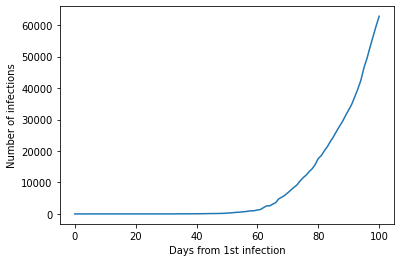

In [16]:
import matplotlib.pyplot as plt
plt.plot(list(range(0,counts_np.shape[0])),counts_np)
plt.xlabel("Days from 1st infection") 
plt.ylabel("Number of infections") 
plt.show()


## Formulate the data-set


In [17]:
x_days = np.array(list(range(0, len(counts_np))))
x_days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [18]:
y_infections_india = counts_np
y_infections_india

array([    1,     1,     1,     2,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     3,     3,     3,     3,
           3,     3,     3,     3,     3,     5,     5,    28,    30,
          31,    34,    39,    43,    56,    62,    73,    82,   102,
         113,   119,   142,   156,   194,   244,   330,   396,   499,
         536,   657,   727,   887,   987,  1024,  1251,  1397,  1998,
        2543,  2567,  3082,  3588,  4778,  5311,  5916,  6725,  7598,
        8446,  9205, 10453, 11487, 12322, 13430, 14352, 15722, 17615,
       18539, 20080, 21370, 23077, 24530, 26283, 27890, 29451, 31324,
       33062, 34863, 37257, 39699, 42505, 46437, 49400, 52987, 56351,
       59695, 62808])

## Obtaining data for any country

Note the changes, to add up all provinces/regions within a country, if found. For example, there are more than one regions in China.

In [0]:
def get_covidian_count(country_name):
  country_data = numbers_df[numbers_df["Country/Region"] == country_name]
  rows = country_data.shape[0]
  counts = country_data.iloc[0:rows, range(4, len(country_data.columns))]
  counts = counts.sum()
  startCol = 0
  for column in counts:
    if column > 0:
      break
    startCol = startCol + 1
  counts = counts.iloc[range(startCol, len(counts))]
  np_arr = np.squeeze(counts.to_numpy())
  x_days = np.array(list(range(0, len(np_arr))))
  return np.array([x_days, np_arr])



In [20]:
infections_usa = get_covidian_count("US")
infections_india = get_covidian_count("India")
infections_china = get_covidian_count("China")
infections_india

array([[    0,     1,     2,     3,     4,     5,     6,     7,     8,
            9,    10,    11,    12,    13,    14,    15,    16,    17,
           18,    19,    20,    21,    22,    23,    24,    25,    26,
           27,    28,    29,    30,    31,    32,    33,    34,    35,
           36,    37,    38,    39,    40,    41,    42,    43,    44,
           45,    46,    47,    48,    49,    50,    51,    52,    53,
           54,    55,    56,    57,    58,    59,    60,    61,    62,
           63,    64,    65,    66,    67,    68,    69,    70,    71,
           72,    73,    74,    75,    76,    77,    78,    79,    80,
           81,    82,    83,    84,    85,    86,    87,    88,    89,
           90,    91,    92,    93,    94,    95,    96,    97,    98,
           99,   100],
       [    1,     1,     1,     2,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     3,     3,     3,
            3,     3,     3,     3,     3,     3,     

In [0]:
np.savetxt("usa.csv",  np.transpose([infections_usa[0],infections_usa[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("india.csv",  np.transpose([infections_india[0],infections_india[1]]), fmt="%d,%d", header="Days, Count")
np.savetxt("china.csv",  np.transpose([infections_china[0],infections_china[1]]), fmt="%d,%d", header="Days, Count")

To confirm the data is proper, load the data back and check.

In [22]:
test_np = np.loadtxt("usa.csv", delimiter=',', skiprows=1, dtype='int,int')
test_np

array([(  0,       1), (  1,       1), (  2,       2), (  3,       2),
       (  4,       5), (  5,       5), (  6,       5), (  7,       5),
       (  8,       5), (  9,       7), ( 10,       8), ( 11,       8),
       ( 12,      11), ( 13,      11), ( 14,      11), ( 15,      11),
       ( 16,      11), ( 17,      11), ( 18,      11), ( 19,      11),
       ( 20,      12), ( 21,      12), ( 22,      13), ( 23,      13),
       ( 24,      13), ( 25,      13), ( 26,      13), ( 27,      13),
       ( 28,      13), ( 29,      13), ( 30,      15), ( 31,      15),
       ( 32,      15), ( 33,      51), ( 34,      51), ( 35,      57),
       ( 36,      58), ( 37,      60), ( 38,      68), ( 39,      74),
       ( 40,      98), ( 41,     118), ( 42,     149), ( 43,     217),
       ( 44,     262), ( 45,     402), ( 46,     518), ( 47,     583),
       ( 48,     959), ( 49,    1281), ( 50,    1663), ( 51,    2179),
       ( 52,    2727), ( 53,    3499), ( 54,    4632), ( 55,    6421),
      

## Given x, predict y

#### Kaggle
Note - this notebook is also available as a Kaggle kernel, at
https://www.kaggle.com/prabindh/kernel5f31471257

#### References
1. https://pypi.org/project/fbprophet

2. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
